## IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

## LOAD DATA

In [10]:
jobs_df = pd.read_csv('../processed/job_descriptions_parsed.csv')
cvs_df = pd.read_csv('../processed/cv_features_parsed.csv')
training_df = pd.read_csv('../processed/training_data.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nNumber of Job Descriptions: {len(jobs_df)}")
print(f"Number of CVs: {len(cvs_df)}")
print(f"Number of Training Pairs: {len(training_df)}")
print(f"\nAverage CVs per Job: {len(training_df) / len(jobs_df):.1f}")

DATASET OVERVIEW

Number of Job Descriptions: 853
Number of CVs: 2484
Number of Training Pairs: 42650

Average CVs per Job: 50.0


## JOB DESCRIPTIONS ANALYSIS


Missing Values in Jobs:
company_name            0
position_title          0
skills                  0
min_experience          9
education             102
seniority               9
description_length      0
skills_count            0
dtype: int64

Experience Requirements Distribution:
min_experience
0.0      24
1.0      77
2.0      18
3.0      67
5.0      75
8.0     403
12.0    180
Name: count, dtype: int64


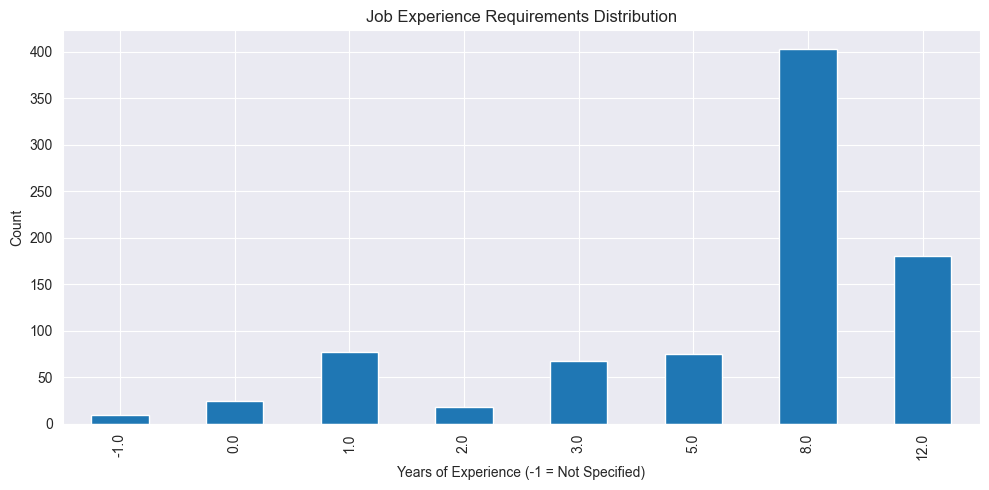


Education Requirements Distribution:
education
associate        386
bachelor         209
master           128
phd               14
high school       10
undergraduate      4
Name: count, dtype: int64


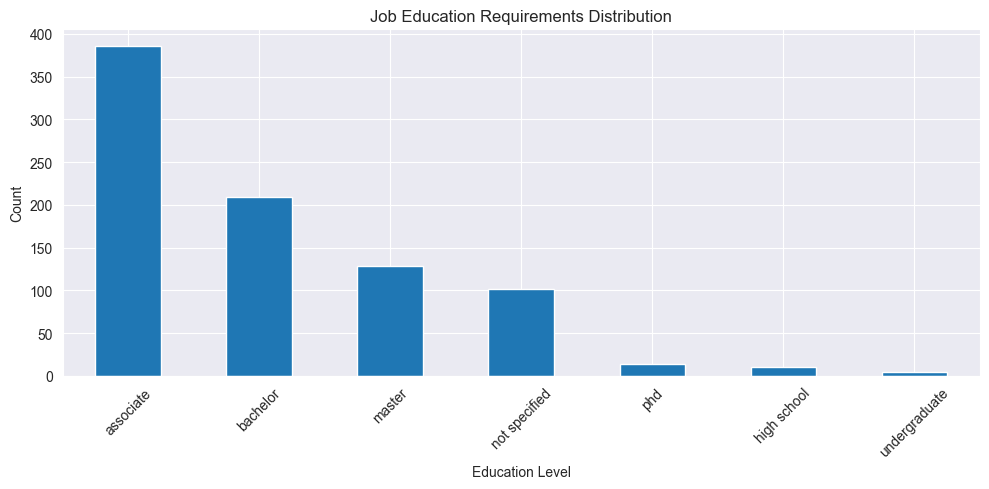


Seniority Distribution:
seniority
manager      403
executive    180
junior        95
senior        75
mid           67
intern        24
Name: count, dtype: int64


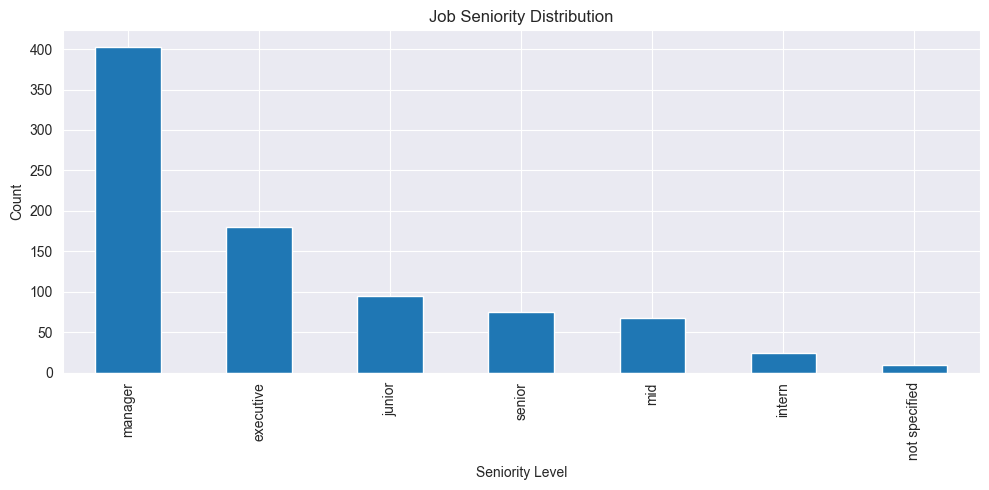


Top 20 Job Skills:
  go: 588
  communication: 552
  leadership: 427
  excel: 416
  time management: 399
  creativity: 276
  medical: 267
  teamwork: 254
  critical thinking: 245
  adaptability: 234
  rest: 223
  git: 148
  api: 136
  problem solving: 134
  aws: 119
  attention to detail: 118
  sem: 117
  rust: 102
  social media: 62
  clinical: 57


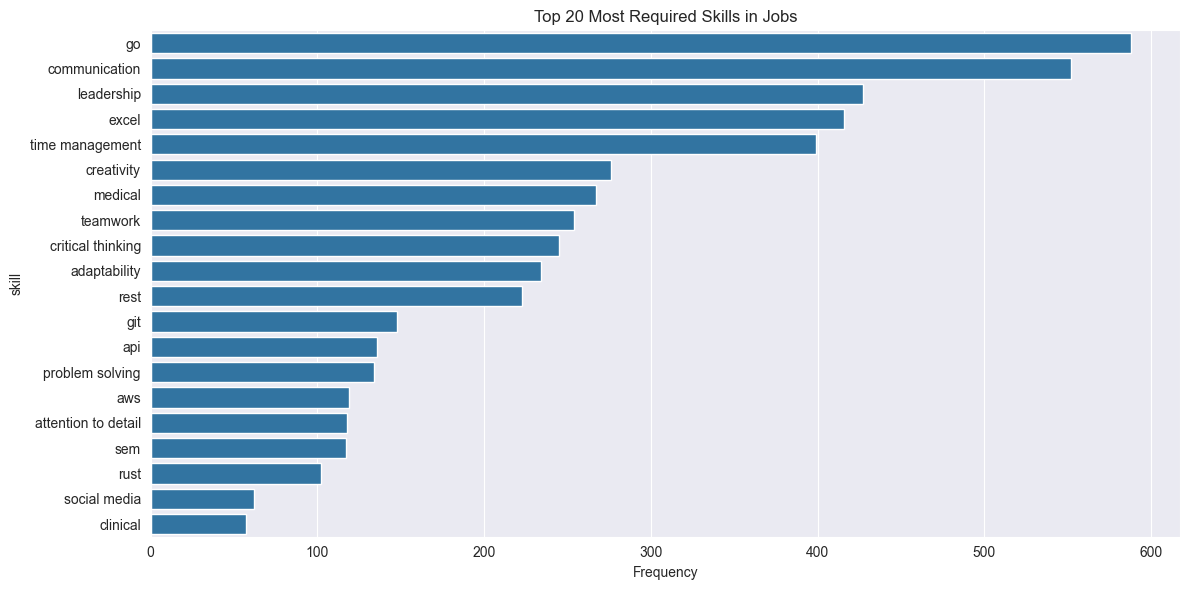

In [11]:
# 2.1 Khảo sát các dữ liệu thiếu
print("\nMissing Values in Jobs:")
print(jobs_df.isnull().sum())

# 2.2 Thống kê yêu cầu số năm kinh nghiệm trong JD
print("\nExperience Requirements Distribution:")
exp_dist = jobs_df['min_experience'].value_counts().sort_index()
print(exp_dist)

plt.figure(figsize=(10, 5))
jobs_df['min_experience'].fillna(-1).value_counts().sort_index().plot(kind='bar')
plt.title('Job Experience Requirements Distribution')
plt.xlabel('Years of Experience (-1 = Not Specified)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.3 Thống kê yêu cầu học vấn
print("\nEducation Requirements Distribution:")
edu_dist = jobs_df['education'].value_counts()
print(edu_dist)

plt.figure(figsize=(10, 5))
jobs_df['education'].fillna('not specified').value_counts().plot(kind='bar')
plt.title('Job Education Requirements Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.4 Thống kê chức vụ
print("\nSeniority Distribution:")
seniority_dist = jobs_df['seniority'].value_counts()
print(seniority_dist)

plt.figure(figsize=(10, 5))
jobs_df['seniority'].fillna('not specified').value_counts().plot(kind='bar')
plt.title('Job Seniority Distribution')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.5 Thống kê kĩ năng
all_job_skills = []
for skills_json in jobs_df['skills'].dropna():
    try:
        skills = json.loads(skills_json)
        all_job_skills.extend(skills)
    except:
        continue

skill_counter = Counter(all_job_skills)
top_20_skills = skill_counter.most_common(20)

print("\nTop 20 Job Skills:")
for skill, count in top_20_skills:
    print(f"  {skill}: {count}")

plt.figure(figsize=(12, 6))
skills_df = pd.DataFrame(top_20_skills, columns=['skill', 'count'])
sns.barplot(data=skills_df, x='count', y='skill')
plt.title('Top 20 Most Required Skills in Jobs')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## CV ANALYSIS


Missing Values in CVs:
category                  0
industry                  0
email                  2465
phone                  2079
experience_years          1
education                31
graduation_year        2484
domain_skills             0
soft_skills               0
resume_length             0
domain_skills_count       0
soft_skills_count         0
dtype: int64

CV Experience Distribution:
experience_years
0.0     270
1.0     565
2.0     819
3.0     458
4.0      14
5.0      93
6.0      10
7.0      16
8.0      13
9.0       9
10.0     48
11.0      4
12.0     15
13.0      6
14.0      7
Name: count, dtype: int64


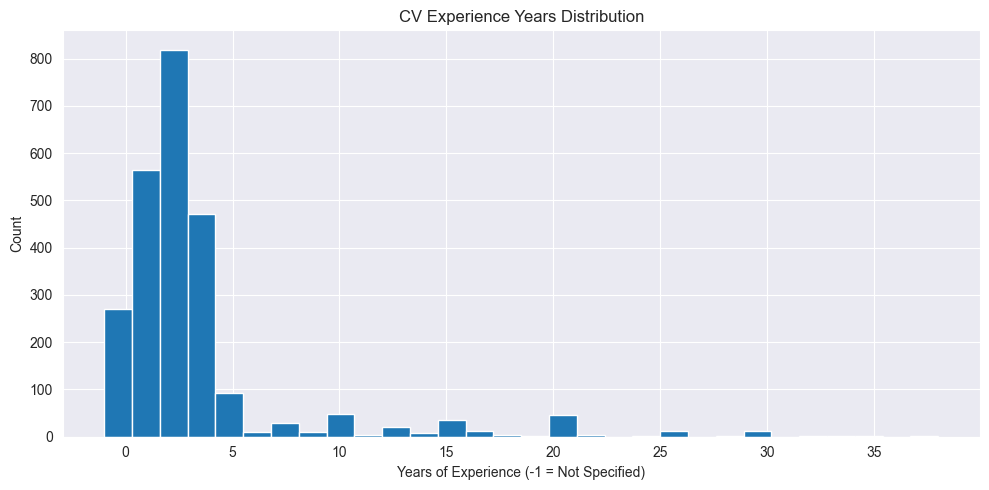


CV Education Distribution:
education
master           1125
bachelor          890
associate         355
phd                45
high school        37
undergraduate       1
Name: count, dtype: int64


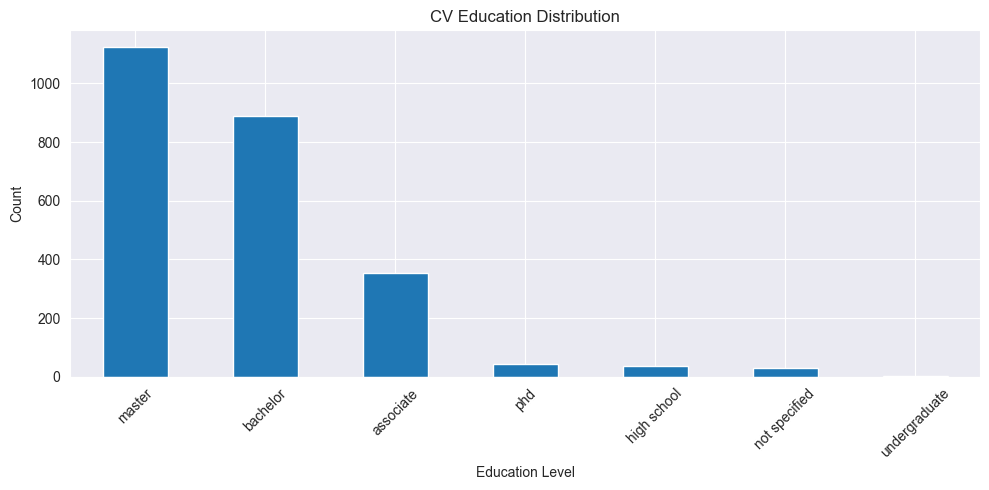


Top 20 CV Skills:
  go: 2033
  excel: 1616
  rest: 937
  sem: 785
  api: 469
  medical: 445
  git: 330
  negotiation: 306
  budgeting: 305
  aws: 302
  social media: 290
  tax: 278
  rust: 257
  sap: 211
  cpr: 192
  sql: 191
  clinical: 190
  oracle: 171
  quickbooks: 166
  account management: 157


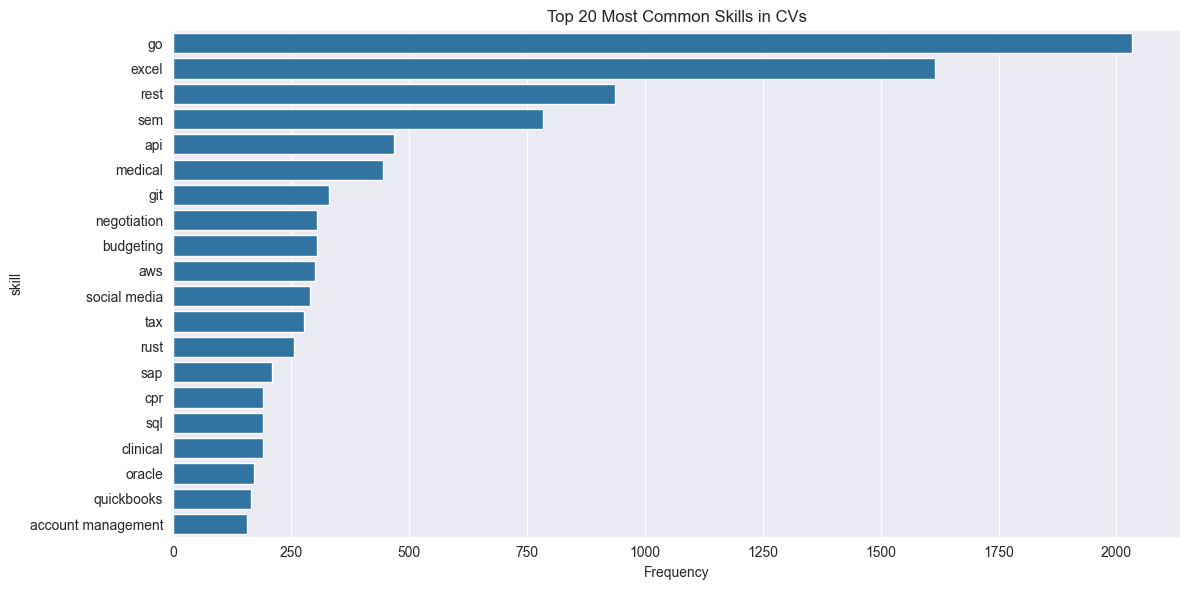

In [12]:
# 3.1 Khảo sát các dữ liệu thiếu
print("\nMissing Values in CVs:")
print(cvs_df.isnull().sum())

# 3.2 Thống kê kinh nghiệm việc làm
print("\nCV Experience Distribution:")
cv_exp_dist = cvs_df['experience_years'].value_counts().sort_index()
print(cv_exp_dist.head(15))

plt.figure(figsize=(10, 5))
cvs_df['experience_years'].fillna(-1).hist(bins=30)
plt.title('CV Experience Years Distribution')
plt.xlabel('Years of Experience (-1 = Not Specified)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3.3 Thống kê trình độ học vấn
print("\nCV Education Distribution:")
cv_edu_dist = cvs_df['education'].value_counts()
print(cv_edu_dist)

plt.figure(figsize=(10, 5))
cvs_df['education'].fillna('not specified').value_counts().plot(kind='bar')
plt.title('CV Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.4 Thống kê kĩ năng
all_cv_skills = []
for skills_json in cvs_df['domain_skills'].dropna():
    try:
        skills = json.loads(skills_json)
        all_cv_skills.extend(skills)
    except:
        continue

cv_skill_counter = Counter(all_cv_skills)
top_20_cv_skills = cv_skill_counter.most_common(20)

print("\nTop 20 CV Skills:")
for skill, count in top_20_cv_skills:
    print(f"  {skill}: {count}")

plt.figure(figsize=(12, 6))
cv_skills_df = pd.DataFrame(top_20_cv_skills, columns=['skill', 'count'])
sns.barplot(data=cv_skills_df, x='count', y='skill')
plt.title('Top 20 Most Common Skills in CVs')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()